# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# EDA

In [104]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [105]:
# read the csv file using pandas library
bikes = pd.read_csv('day.csv')

In [106]:
# print the top 5 rows to see what values each columns have
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [107]:
# Check the no of rows and columns in the dataframe
bikes.shape

(730, 16)

In [108]:
# check the size of the bikes
bikes.size

11680

In [109]:
# check the distribution of data for various features in bikes dataframe
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [110]:
# get information about the features of bikes 
# Observations: There are no null values.
# There is one columns with object data type
# 4 columns with float data type
# 11 columns with int data type
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [111]:
# check for any duplicate data in bikes
# Observation: There are no duplicate values
bikes[bikes.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [112]:
# check for any null values
# Observation: there are no null values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [113]:
#Check if there are any null rows 
# there are no null rows

bikes[bikes.isnull().sum(axis=1)/len(bikes) > 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [114]:
# check the no of unique values in the dataframe
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [115]:
# check the distinct values for the features that have min unique values and their count
cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in bikes[cols]:
    print(i,bikes[i].unique())
    print(i,bikes[i].value_counts())



season [1 2 3 4]
season 3    188
2    184
1    180
4    178
Name: season, dtype: int64
yr [0 1]
yr 0    365
1    365
Name: yr, dtype: int64
mnth [ 1  2  3  4  5  6  7  8  9 10 11 12]
mnth 1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
holiday [0 1]
holiday 0    709
1     21
Name: holiday, dtype: int64
weekday [1 2 3 4 5 6 0]
weekday 1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64
workingday [1 0]
workingday 1    504
0    226
Name: workingday, dtype: int64
weathersit [2 1 3]
weathersit 1    463
2    246
3     21
Name: weathersit, dtype: int64


In [116]:
# drop the column instant as it is just an index column and doesnot help with deriving any insights

bikes.drop('instant',inplace=True,axis=1)

In [117]:
# check if the column is dropped.
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [118]:
# since we have year and month columns we can drop the dteday column
bikes.drop('dteday',axis=1,inplace=True)

In [119]:
# check if the column is dropped
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [120]:
# dropping the casual and registered as cnt is the derived variable.

bikes.drop(['casual','registered'],axis=1,inplace=True)

In [121]:
# print the top 5 rows

bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [122]:
# get the distribution of data
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [123]:
# converting features season to categorical variable as considering them as numerical variable might cause problem with analysis 
# it can be considered as ordered element
# season (1:spring, 2:summer, 3:fall, 4:winter)
bikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [124]:
# replace the numeric values with categorical values
bikes.season = bikes.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [125]:
#check the count of each categorical value
bikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [126]:
#check the count of each numerical value for 

bikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [127]:
# converting features season to categorical variable as considering them as numerical variable might cause problem with analysis 
# it can be considered as ordered element
bikes.weathersit = bikes.weathersit.map({1:"clear",2:"Mist",3:"light",4:"heavy"})

In [128]:
#check the count of each categorical value
bikes.weathersit.value_counts()

clear    463
Mist     246
light     21
Name: weathersit, dtype: int64

In [129]:
# check the value count for weekdays.
bikes.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [130]:
# convert the weekdays to name instead of numerical value
bikes.weekday = bikes.weekday.map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})

In [131]:
# check the value count for weekdays.
bikes.weekday.value_counts()

Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Sun    104
Name: weekday, dtype: int64

In [132]:
# check the value count for mnth.
bikes.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [133]:
# convert the nos to respective months
bikes.mnth = bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [134]:
# get the top 5 rows
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### We are not changing the value of year,holiday,workingday to catagegorical names as they are already in standardized format of 1 and 0 which is needed for linear model

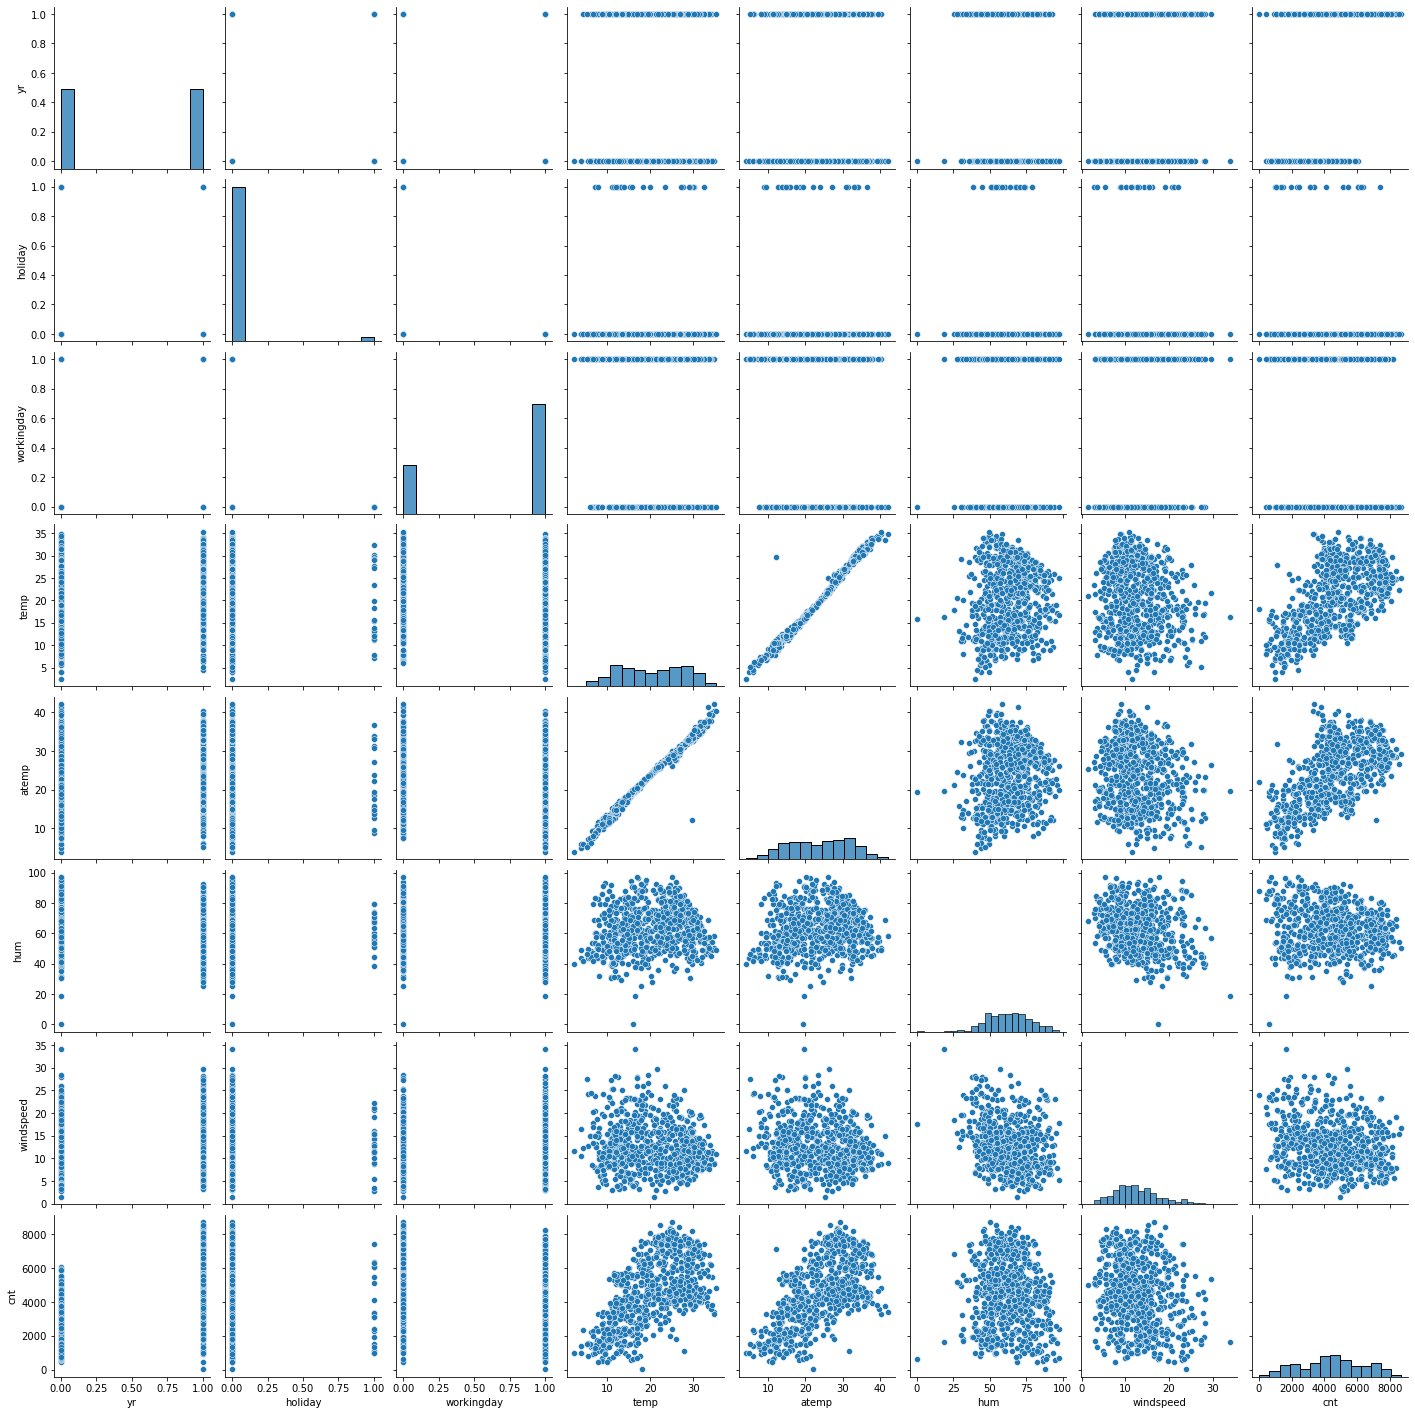

In [135]:
# plot the pair plot for all the variables.
sns.pairplot(bikes)
plt.show()

#### Observations:

The variables temp and atemp shows linear relations ship wih each other and viceversa
The variables temp and atemp shows positive linear type relation ship with cnt target variable.
The variables yr,holiday and working day are categorical variables so dont consider them as they will not be able to provide insights 

In [136]:
# get the top 5 rows
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [137]:
# understanding the categorical,continous and target variables
cont_var = ['temp','atemp','hum','windspeed']
cat_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
target_var = ['cnt']


# Univariate Analysis

temp plotted


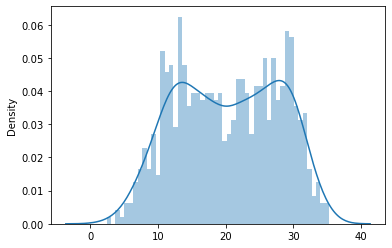

atemp plotted


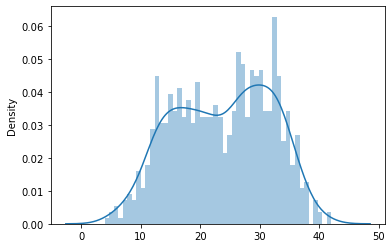

hum plotted


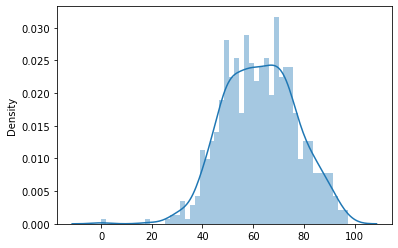

windspeed plotted


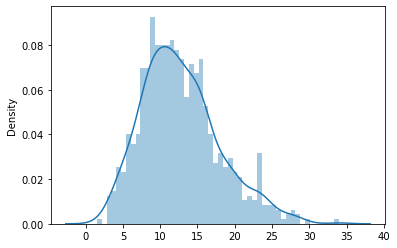

In [138]:
# create distplot for cont_variables 
for i in cont_var:
    print(i, 'plotted')
    sns.distplot(x=bikes[i],bins = 50)
    plt.show()

### observations:
### looks like humidity and windspeed - show the bell curve

season plotted


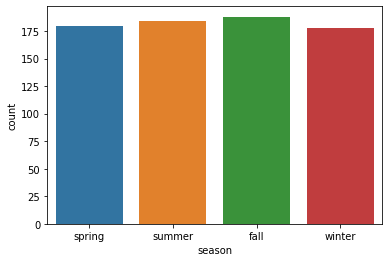

yr plotted


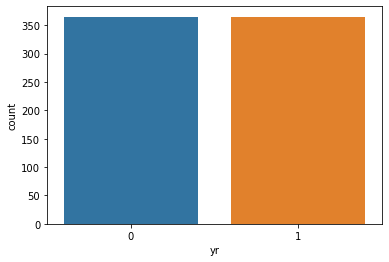

mnth plotted


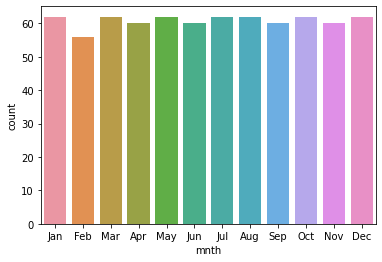

holiday plotted


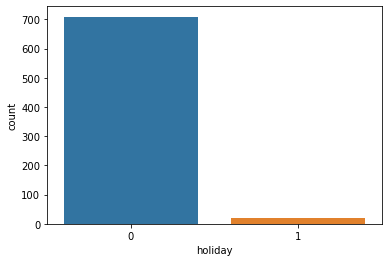

weekday plotted


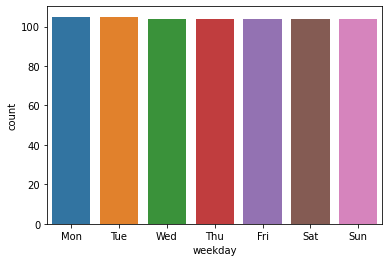

workingday plotted


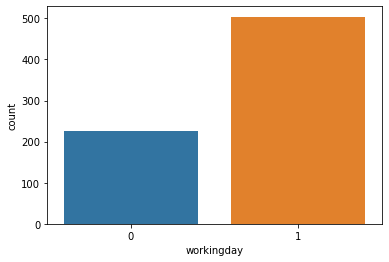

weathersit plotted


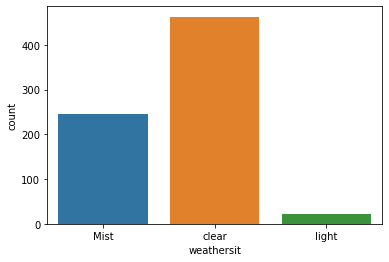

In [139]:
# create a count plots for the categorical variables.
for i in cat_var:
    print(i, 'plotted')
    sns.countplot(x=bikes[i])
    plt.show()

# Observations:

1. We dont see much difference with the seasons, but fall seems to be the highest.
2. No of holidays is less compared to working days.
3. We have more working days compared to weekends
4. The clear weathersit has more count. 

# Bivariate analysis

season  vs cnt


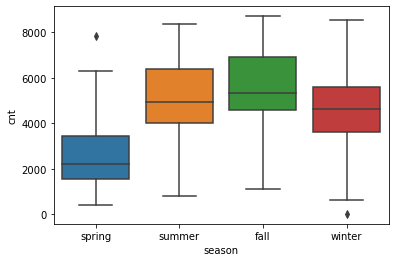

yr  vs cnt


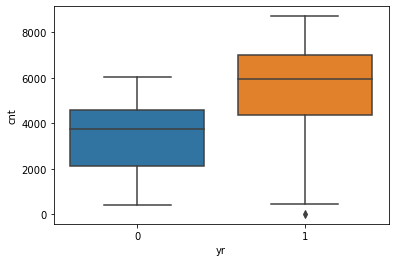

mnth  vs cnt


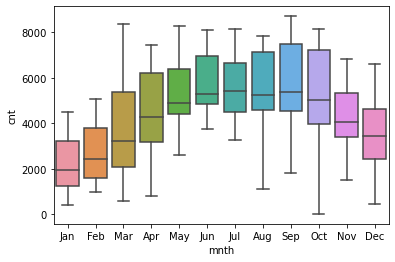

holiday  vs cnt


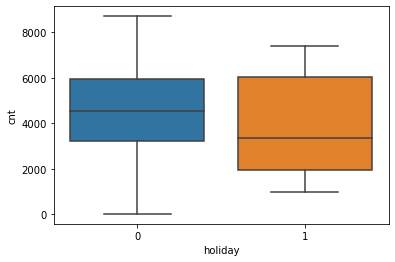

weekday  vs cnt


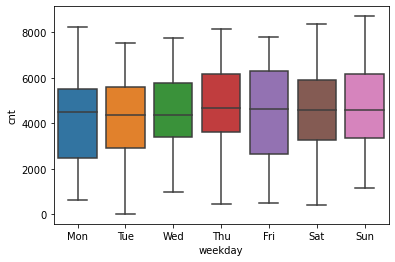

workingday  vs cnt


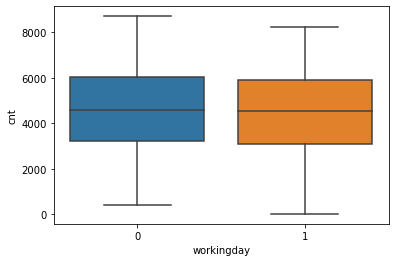

weathersit  vs cnt


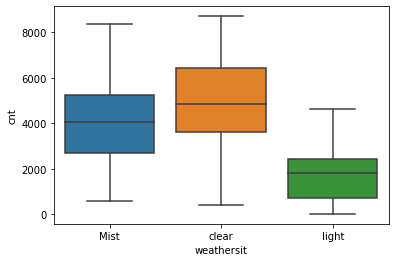

In [140]:
# create a box plot for categorical variables against the target variable cnt.
for i in cat_var:
    print(i," vs cnt" )
    sns.boxplot(x=bikes[i],y = bikes.cnt)
    plt.show()

# Observations: We created the boxplot for categorical variables
1. For the fall season we see the max no of bookings of vechicles.
2. The no of bike booking is more in year 2019 compared to 2018.
3. For the month of Sep we see max bookings.
4. The no of bookings is highest on non holiday days.
5. Max bookings are found on weekends.
6. Max bookings are found on non working days.
7. Max bookings are found on clear weather days. 

# Multivariate analysis

In [141]:
# create correleation matrix
# Observation: we see that atemp and temp are highly correlated with correlation of 0.99
corr_matrix = bikes[['temp','atemp','hum','windspeed','cnt']].corr()
corr_matrix 

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [142]:
# Sort the variables as per the correlation value in descending order againt the cnt target variable.
# Observation: We can see that atemp and temp have similar type of correlation with cnt i.e 0.63

corr_matrix['cnt'].sort_values(ascending=False)

cnt          1.000000
atemp        0.630685
temp         0.627044
hum         -0.098543
windspeed   -0.235132
Name: cnt, dtype: float64

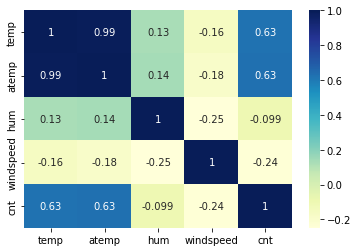

In [143]:
# creat a heatmap to understand teh corrlation better between the numerical variables.
sns.heatmap(bikes[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu')

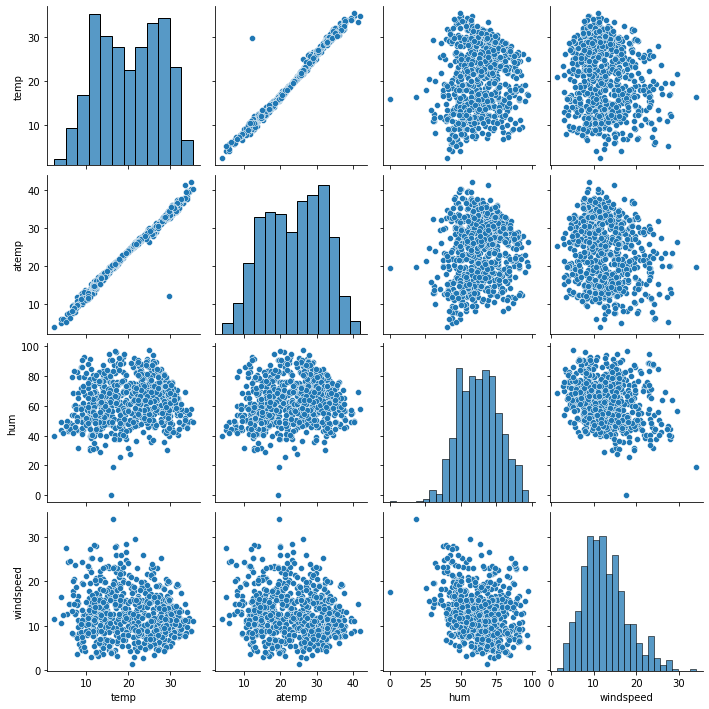

In [144]:
# create a pair plot for cont_var
sns.pairplot(bikes[cont_var])

# observations:
1. It is found that temp and atemp have highest correlation with cnt - bookings of the bike.
2. From the pair plot both temp and atemp variables follow the linear correlation against each other this might be due to high colinearity need to check when modeling.
3. From the pair plot looks like the temp and atemp follows the positivie correlations against the cnt. 


# Data Preparation for Model building

In [145]:
# import the libraries needed for Linear regression

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [146]:
# categorical variables for whih dummies needs to be created
cat_var = ['season', 'mnth', 'weekday', 'weathersit']

In [147]:
# create dummy variables for categorical variables
dummy_vars = pd.get_dummies(bikes[cat_var],drop_first=True)
dummy_vars.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [148]:
# concatenate the bikes and dummy vars in bikes dataframe
bikes = pd.concat([bikes,dummy_vars],axis=1)

In [149]:
# get the top 5 rows
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
0,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,1,0
3,spring,0,Jan,0,Thu,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,1,0
4,spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,1,0


In [150]:
# drop the redundant columns as we have concatenated the dummy variables
bikes.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [151]:
# get the top 5 rows
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [152]:
# check the data distribution
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.634247,0.028767
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.481971,0.167266
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We see that except temp,atemp,hum,windspeed and cnt all other numerical variables have the min as 0 and max as 1 in the data distribution

In [153]:
# split the train and test data

bikes_train,bikes_test=train_test_split(bikes,train_size=0.7,random_state=100)
print(bikes_train.shape)
print(bikes_test.shape)

(510, 30)
(220, 30)


In [154]:
# Rescaling the features - temp,atemp,hum,windspeed,cnt using MinMaxScaler

#1. Instantiate an object
scaler = MinMaxScaler()

# create a list of numeric variables

num_vars = ['temp','atemp','hum','windspeed','cnt']

#2. fit and transform

bikes_train[num_vars]= scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,0


In [155]:
# get the data distribution post rescaling
bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.625490,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.484471,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
# get the data distribution post rescaling
bikes_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


Now we see that all numerical variables have the min as 0 and max as 1 in the data distribution

# Training the model

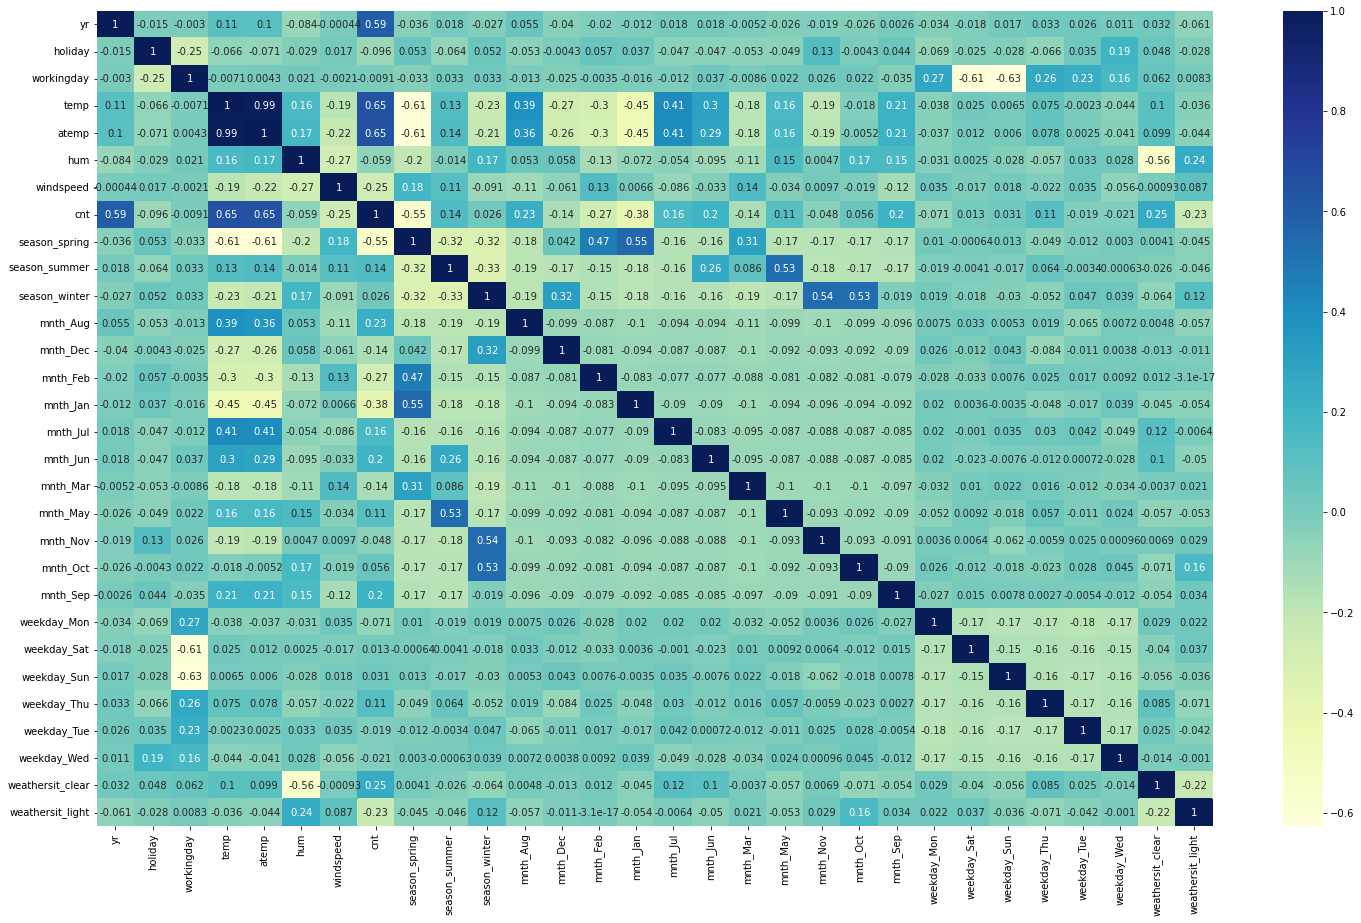

In [157]:
# create a heatmap for all the variables

plt.figure(figsize=(25,15))
sns.heatmap(bikes_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [158]:
# generate the column list in bikes_train dataframe
bikes_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_clear', 'weathersit_light'],
      dtype='object')

In [159]:
# Create X_train, y_train

y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [160]:
# get top 5 rows of X_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [161]:
# get top 4 rows of y_train
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [162]:
# check the shape of X_train variable
X_train.shape

(510, 29)

In [163]:
# check the shape of y_train variable
y_train.shape

(510,)

# Building a model - Method 2 using both linear regression and  statsmodels
## We will use all the variables and then remove them one by one to build the model.

Note: We are using linear regression and statsmodel as the no of variables is high and the iterations of removing the variables one by one to build the model is tedious and time consuming

### Model 1

In [164]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [165]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression() # Initiate the linear regression 
lm.fit(X_train, y_train) # fit the X_train and y_train models to the linear regression

rfe = RFE(lm, n_features_to_select=15)             # running RFE for 15 features against the linear regression.
rfe = rfe.fit(X_train, y_train)

In [166]:
# list the features and rankings against them and which feature to be considered
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 9),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('weathersit_clear', True, 1),
 ('weathersit_light', True, 1)]

In [167]:
# All the accepted features for building model
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weathersit_clear', 'weathersit_light'],
      dtype='object')

In [168]:
# we can see that there are 15 features selected.
len(col)

15

In [169]:
# All the rejected features for building model
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [170]:
# We can see that there are 14 features which were not selected.
len(X_train.columns[~rfe.support_])

14

In [171]:
# creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_clear,weathersit_light
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,1,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0


In [172]:
# build the model with all variables

X_train_sm = sm.add_constant(X_train_rfe)

# running the linear model

lr_model1 = sm.OLS(y_train,X_train_sm).fit()

# lets see the summary of the linear model.

print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        18:23:47   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2654      0.039  

# Checking VIF

In [173]:
# calculate the vif value agains the features to determine the multi collinearity 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,hum,25.93
2,temp,21.39
5,season_spring,4.96
4,windspeed,4.70
7,season_winter,4.33
13,weathersit_clear,3.56
6,season_summer,3.00
0,yr,2.09
11,mnth_Nov,1.87
9,mnth_Jan,1.76


#### Observations of Model 1:
1.  R-squared:                       0.845 - is almost equal to adjusted r-square
2.  Adj. R-squared:                  0.840
3.  F-statistic:                     179.4 
4.  Const - coefficient              0.2654
5.  p- values of all the features is <0.05
6.  We have hum,temp with high VIF 

### Model 2

To drop the variables there are 2 options

- we can drop a variable based on the significance of p values
- we can drop them based on VIF
We could have:

- high p-value,  high vif -- drop this variable.
- high low:
    - high p , low vif : remove these first.
    - low p , high vif : remove these after the ones above
- low p, low vif - you can keep these variables.
    

### We can see that the p - values for all the variables is below 0.05 so we dont have any columns with high p value to be dropped.
### We see that hum column has high vif of around 25.93 we will drop this column and build the model

In [174]:
# drop the hum feature
X_train_rfe.drop('hum',axis=1,inplace=True)

In [175]:
# build the model without hum feature
X_train_sm = sm.add_constant(X_train_rfe)

# create the model

lr = sm.OLS(y_train,X_train_sm)

# fit the model

lr_model2 = lr.fit()

# check the summary

print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          4.75e-186
Time:                        18:23:47   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1650      0.032  

In [176]:
# calculate the vif for the features
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
2,temp,5.87
3,windspeed,4.69
4,season_spring,2.97
6,season_winter,2.91
12,weathersit_clear,2.86
5,season_summer,2.21
0,yr,2.07
10,mnth_Nov,1.82
8,mnth_Jan,1.64
9,mnth_Jul,1.60


# Residual Analysis for model 2

In [177]:
# the actual ytrain - y predicted values of y.
y_train_pred = lr_model2.predict(X_train_sm)
y_train_pred

576    0.745118
426    0.481772
728    0.367860
482    0.578017
111    0.291187
         ...   
578    0.828865
53     0.245013
350    0.249495
79     0.318848
520    0.640640
Length: 510, dtype: float64

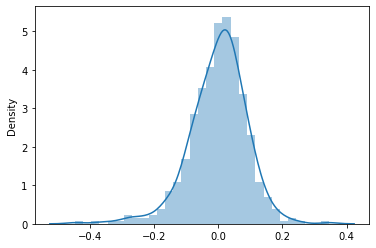

In [178]:
res = y_train - y_train_pred

sns.distplot(res)

#### Observations of Model 2:
1. Post dropping the hum feature we see that the vif of the temp has reduced to 5.872
2. R-squared is 0.839 and adjusted R-squared is  0.835, which has reduced from 0.845 and 0.840 respectivey compared to model 1.
3. const - coefficient has reduced to 0.1650
4. We also see the p values have reduced for few features

### Model 3

### We can see that the p - values for all the variables is below 0.05 so we dont have any columns with high p value to be dropped.
### We see that temp column has vif around 5.87 we will drop this column and build the model as the vif should be <=5 as anything >5 is considered to have high multicolinearity. Some consider the range of vif up to 10 but in our case i am considering it as 5

In [179]:
# drop the temp feature
X_train_rfe.drop('temp',axis=1,inplace=True)

In [180]:
# build new model excluding temp feature
X_train_sm = sm.add_constant(X_train_rfe)

# create the model

lr = sm.OLS(y_train,X_train_sm)

# fit the model

lr_model3 = lr.fit()

# check the summary

print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.82e-159
Time:                        18:23:48   Log-Likelihood:                 438.84
No. Observations:                 510   AIC:                            -849.7
Df Residuals:                     496   BIC:                            -790.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5085      0.017  

In [181]:
# calculate the vif for all the features
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
2,windspeed,4.07
3,season_spring,2.96
5,season_winter,2.83
11,weathersit_clear,2.45
4,season_summer,2.03
0,yr,1.87
9,mnth_Nov,1.80
7,mnth_Jan,1.63
6,mnth_Dec,1.46
8,mnth_Jul,1.30


In [182]:
# Check the coefficent for features of the model 3
lr_model3.params.sort_values(ascending=False)

const               0.508462
yr                  0.245724
weathersit_clear    0.086918
mnth_Sep            0.053371
mnth_Jul           -0.018222
season_winter      -0.023054
season_summer      -0.049694
holiday            -0.085507
mnth_Nov           -0.099464
mnth_Dec           -0.108634
mnth_Jan           -0.120162
windspeed          -0.190233
weathersit_light   -0.224786
season_spring      -0.250334
dtype: float64

##### Note: We see that there are no futher p values greater than 0.05 and vif greater than 5 so we are good and we will stop building further training models

# Residual Analysis for Model 3

In [183]:
# the actual ytrain - y predicted values of y.
y_train_pred = lr_model3.predict(X_train_sm)
y_train_pred

576    0.772530
426    0.455277
728    0.355991
482    0.668638
111    0.386293
         ...   
578    0.805503
53     0.323858
350    0.294628
79     0.357967
520    0.636084
Length: 510, dtype: float64

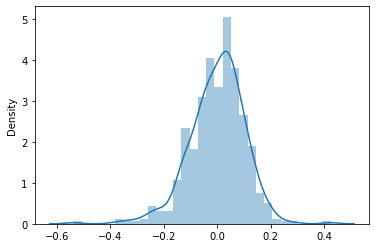

In [184]:
res = y_train - y_train_pred

sns.distplot(res)

Text(0, 0.5, 'y_train_pred')

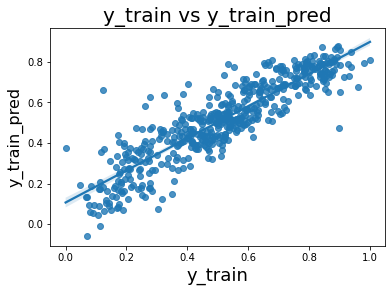

In [185]:
# create a regplot which draws the linear line across the data distribution
sns.regplot(y_train,y_train_pred)
plt.title('y_train vs y_train_pred',fontsize = 20) # plot heading
plt.xlabel('y_train',fontsize=18) # x-lable
plt.ylabel('y_train_pred',fontsize=16)

In [186]:
# check the mean of residuals
# Observation mean is almost near to 0.
mean_res = np.mean(res)
print("Mean of residuals is {}".format(mean_res))

Mean of residuals is 1.3339003104687542e-16


Text(0.5, 1.0, 'y_train_pred vs res')

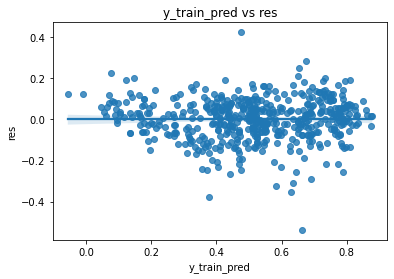

In [187]:
# check for homoscedasticity

sns.regplot(y_train_pred,res)
plt.xlabel('y_train_pred')
plt.ylabel('res')
plt.title('y_train_pred vs res')


# Predictions and evalutaion on the test data

In [188]:
# create a is ist of numeric vars
num_vars = ['temp','atemp','hum','windspeed','cnt']

# 2. transform on date
# transform() - it computes x - xmin/xmax-xmin
# fit_transform - it is combi of fit and transform
bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])
bikes_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,1,0


In [189]:
bikes_test[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.755981,0.713308,0.743798,0.402718,0.677750
max,0.984424,0.980934,1.002146,0.807474,0.963300


- the max values are not exactly 1 where as in the training dataset it is 1.
- the min values are also not 0 where as in the training dataset it is 0.

This is bcoz we have fit the scaler with the train set so the min and max values the MinMaxScaler is using is actually the train set.

the min and max values for prices are from training set and we have done the transformation

In [190]:
# create X_test and y_test from bikes_test
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [191]:
# add a constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_clear,weathersit_light
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,1,0,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,1,0,0,1,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,1,0,0,1,0,0,0,0,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,1,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,1,0,0,0,0,1,0


In [192]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_clear', 'weathersit_light'],
      dtype='object')

In [193]:
# prediction
X_test_sm = X_test_sm.drop(['workingday','temp','atemp','hum',
                            'mnth_Aug','mnth_Feb','mnth_Jun','mnth_Mar',
                            'mnth_May','mnth_Oct','weekday_Mon',
                            'weekday_Sat','weekday_Sun','weekday_Thu',
                            'weekday_Tue','weekday_Wed'],axis=1)

In [194]:
# prediction

y_test_pred= lr_model3.predict(X_test_sm)

In [195]:
#evaluate the model

r2_score(y_true = y_test, y_pred = y_test_pred)



0.7779806740725193

The r2-score on the test is 77.8% and that of the the train is 79.2% so it is almost near to train around 1.4 difference which is acceptable within 2% difference. So what the model has learnt on the training set was able to generalize on the test set.

# Model evaluation

Text(0, 0.5, 'y_test_pred')

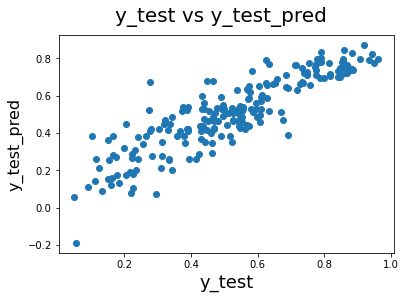

In [196]:
# plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred',fontsize = 20) # plot heading
plt.xlabel('y_test',fontsize=18) # x-lable
plt.ylabel('y_test_pred',fontsize=16)

Text(0, 0.5, 'y_test_pred')

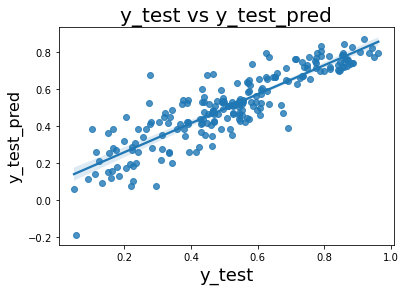

In [197]:
# create a regplot which draws the linear line across the data distribution
sns.regplot(y_test,y_test_pred)
plt.title('y_test vs y_test_pred',fontsize = 20) # plot heading
plt.xlabel('y_test',fontsize=18) # x-lable
plt.ylabel('y_test_pred',fontsize=16)

We can see that the equation of our best fitted line is:

cnt = 0.508462 + 0.245724  \times  yr - 0.085507 \times holiday - 0.190233 \times windspeed - 0.250334 \times season_spring -0.049694 \times season_summer-0.023054 \times season_winter-0.108634 \times mnth_Dec -0.120162 \times mnth_Jan-0.018222 \times mnth_Jul-0.099464 \times mnth_Nov+0.053371 \times mnth_Sep+0.086918 \times weathersit_clear-0.224786 \times weathersit_light  

Overall we have a decent model.




#  Significant features are as below and their associated coefficients:

yr                  0.245724

weathersit_clear    0.086918

mnth_Sep            0.053371

mnth_Jul           -0.018222

season_winter      -0.023054

season_summer      -0.049694

holiday            -0.085507

mnth_Nov           -0.099464

mnth_Dec           -0.108634

mnth_Jan           -0.120162

windspeed          -0.190233

weathersit_light   -0.224786

season_spring      -0.250334

# Top 3 significant features are
1. Year
2. spring season
3. When the weather condition is Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds



# Conclusion:

1. We can see that there are features which positive and negative. The +ve independent features will lead to increase in demand for the booking and the -ve independent features will decrease demand for booking.  However, we see that the -ve coeffients are weak i.e., <0.5. Though we have weak negative coefficients but considering the weather condition and seasons they might adversely impact the demand for bikes.

2. The company has seen the bike booking grow in the year 2019 compared to 2018. So post covid the company can look towards increase in demand for bike booking. 

3. Company can design business strategy to increase the business during clear weather conditions and during spring season, sep month i.e beginning of fall season in US. Since the weather is clear people would opt bike booking compared to other seasons where they might encounter rains or dry(sunny) days.

4. When there is light weather condition where snow or light rains or high winds, during winter,holiday,summer seasons for the months Jul,Nov - Jan time period where minimal booking is expected due to bad weather condition for bikers. The company can reduce the supply and probably do some other activities like maintenace, reduce the manpower etc.
